Non-Linear Regression Part 2
========================

<div class="overview-this-is-a-title overview">
<p class="overview-title">Overview</p>
<p>Questions</p>
    <ul>
        <li> How can I perform statistically robust non-linear regression in a Jupyter notebook?</li>
    </ul>
<p>Objectives:</p>
    <ul>
        <li> Import data from a csv file
        <li> Create a function based on the equation to be fitted
        <li> Generate the best-fit curve with parameters and statistical descriptors
        <li> Create plots of the data
    </ul>
</div>

## Something old, something new
Old: import csv data to a pandas dataframe
New: create a function based on an equation
New: use tools in SciPy to fit the data to the function
Old: plot the data to display your results

In [1]:
# Import the libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats

In [2]:
cd ~/Desktop/python-scripting-biochemistry/

/Users/pac8612/Desktop/python-scripting-biochemistry


### Review the Michaelis-Menten equation

The Michaelis-Menten equation describes kinetics for enzyme-catalyzed reactions. We will use the simplest version of the equation, based on initial reaction velocities with a single substrate.

In our equation,  there are two parameters, V$_{max}$ (maximum velocity) and K$_m$ (the Michaelis constant, which equals the substrate concentration at half maximal velocity), an independent variable, \[S\] = substrate concentration, and a dependent variable, V$_i$, the initial velocity.

$$
V_i = \frac{V_{max} * [S]}{K_m + [S]}
$$

We will use the following variables for our equation:

- Vmax = the maximum velocity
- Km = the Michaelis constant
- SubConc = substrate concentration
- Vi = initial velocity

In [3]:
# create the filehandle
datafile = os.path.join('biochemist-python', 'chapters', 'data', 'MM_data.csv')
# import the data
rates_df = pd.read_csv(datafile)
rates_df # inspect the data to make sure you have substrate concentrations and initial velocities

,pNPP (mM),slopes,initial velocities
0,20.00,0.514091,34.272718
1,10.00,0.503140,33.542678
2,7.00,0.470435,31.362310
3,4.00,0.417021,27.801416
4,2.00,0.342445,22.829652
5,1.00,0.246260,16.417302
6,0.70,0.202843,13.522863
7,0.40,0.136443,9.096204
8,0.20,0.076442,5.096143
9,0.10,0.078070,5.204653


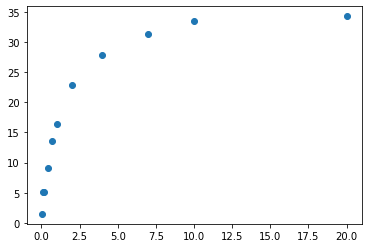

In [11]:
# A look at our data
ydata = rates_df['initial velocities']
xdata = rates_df['pNPP (mM)']
plt.plot(xdata, ydata, 'o', label='data')

In [4]:
# define the function
def MM(SubConc, Vmax, Km):
    Vi = (Vmax * SubConc)/(Km + SubConc)
    return Vi
# set the data
ydata = rates_df['initial velocities']
xdata = rates_df['pNPP (mM)']
rates_df

,pNPP (mM),slopes,initial velocities
0,20.00,0.514091,34.272718
1,10.00,0.503140,33.542678
2,7.00,0.470435,31.362310
3,4.00,0.417021,27.801416
4,2.00,0.342445,22.829652
5,1.00,0.246260,16.417302
6,0.70,0.202843,13.522863
7,0.40,0.136443,9.096204
8,0.20,0.076442,5.096143
9,0.10,0.078070,5.204653


In [5]:
ydata = rates_df('initial velocities') # Common errors and how to read them
# If the errors says "is not callable", you are using parentheses (which call a function) when you should not

TypeError: 'DataFrame' object is not callable

In [6]:
MM(rates_df['pNPP (mM)'], 100, 1)

0     95.238095
1     90.909091
2     87.500000
3     80.000000
4     66.666667
5     50.000000
6     41.176471
7     28.571429
8     16.666667
9      9.090909
10     4.761905
Name: pNPP (mM), dtype: float64

In [7]:
MM(rates_df['pNPP (mM)'], 100, 10)

0     66.666667
1     50.000000
2     41.176471
3     28.571429
4     16.666667
5      9.090909
6      6.542056
7      3.846154
8      1.960784
9      0.990099
10     0.497512
Name: pNPP (mM), dtype: float64

In [ ]:
# Common Errors - color coding and common features of Jupyter notebooks
# str
# def
# import
# 1s
# In [20]

### Using curve_fit
The syntax for the curve_fit function from scipy.optimize is
```python
popt, pcov = curve_fit(function, xdata, ydata)
```
popt: optimized parameters
pcov: a 2D matrix of the covariance for the curve fit
curve_fit: the function from scipy.optimize
function: the function that we are asking curve_fit to fit the data to
x: a data array for the independent variable 
y: a data array for the dependent variable

Let's review the function, `MM`, that we defined above, to clearly distinguish the data that are fed into `curve_fit` and `MM`.

```python
def MM(SubConc, Vmax, Km):
    Vi = (Vmax * SubConc)/(Km + SubConc)
    return Vi
```

You need to pass three pieces of data to `MM` to predict the initial velocity for an enzyme-catalyzed reaction: the substrate concentration, and values for $V_{max}$ and $K_m$.

In [28]:
popt, pcov = curve_fit(MM, xdata, ydata)

In [34]:
Vmax = parameters[0]
Km = parameters[1]
perr = np.sqrt(np.diag(pcov)) # returns one standard deviation for each parameter
print(f'Vmax for this reaction: {Vmax:.2f} +/- {perr[0]:.2f}')
print(f'Km for this reaction: {Km:.2f} +/- {perr[1]:.2f}')

Vmax for this reaction: 36.66 +/- 0.67
Km for this reaction: 1.19 +/- 0.08


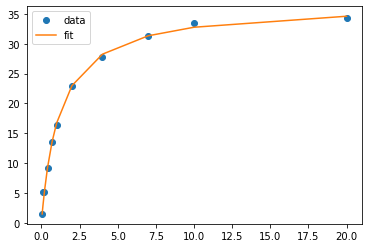

In [36]:
fit_y = MM(xdata, fit_A, fit_B)
plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit')
plt.legend()

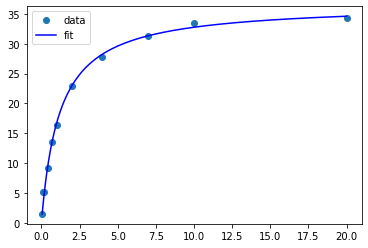

In [41]:
# To generate a smoother fitted curve
smooth_x = np.linspace(np.min(xdata), np.max(xdata), 1000)
fit_y = MM(xdata, fit_A, fit_B)
plt.plot(xdata, ydata, 'o', label='data')
plt.plot(smooth_x, MM(fit_x, fit_A, fit_B), 'b', label = 'fit')
plt.legend()

In [ ]:
# Now improve the plot with seaborn

In [38]:
fit_x = np.linspace(np.min(xdata), np.max(xdata), 1000)
print(fit_x)

[ 0.05        0.06996997  0.08993994  0.10990991  0.12987988  0.14984985
  0.16981982  0.18978979  0.20975976  0.22972973  0.2496997   0.26966967
  0.28963964  0.30960961  0.32957958  0.34954955  0.36951952  0.38948949
  0.40945946  0.42942943  0.4493994   0.46936937  0.48933934  0.50930931
  0.52927928  0.54924925  0.56921922  0.58918919  0.60915916  0.62912913
  0.6490991   0.66906907  0.68903904  0.70900901  0.72897898  0.74894895
  0.76891892  0.78888889  0.80885886  0.82882883  0.8487988   0.86876877
  0.88873874  0.90870871  0.92867868  0.94864865  0.96861862  0.98858859
  1.00855856  1.02852853  1.0484985   1.06846847  1.08843844  1.10840841
  1.12837838  1.14834835  1.16831832  1.18828829  1.20825826  1.22822823
  1.2481982   1.26816817  1.28813814  1.30810811  1.32807808  1.34804805
  1.36801802  1.38798799  1.40795796  1.42792793  1.4478979   1.46786787
  1.48783784  1.50780781  1.52777778  1.54774775  1.56771772  1.58768769
  1.60765766  1.62762763  1.6475976   1.66756757  1